## Non-local elasticity

In the notes, we derived a kernel formulation for the opening of a hydraulic fracture, $v(x)$, due to an internal distribution of pressure, $p(x)$.

\begin{equation}
v(x) = \frac{1}{E'} \int\limits_0^L p(\xi)\,G(x,\xi)\,d\xi,\quad\quad G(x,\xi) = \frac{2}{\pi} \ln\left\lvert\frac{\sqrt{1-(\xi/a)^2}+\sqrt{1-(x/a)^2}}{\sqrt{1-(\xi/a)^2}-\sqrt{1-(x/a)^2}}\right\rvert,
\end{equation}

where $E'$ is Young's modulus, $G$ is the kernel (opening displacement due to a pair of point sources at $\pm\xi$), and $a$ is the length of the fracture.

***Execute the cell below to plot the kernel and experiment with varying the point source position.***

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact

# LEFM point source kernel
def G(x,xi,a):
    return 2/np.pi*np.log(abs((np.sqrt(1-(xi/a)**2)+np.sqrt(1-(x/a)**2))/(np.sqrt(1-(xi/a)**2)-np.sqrt(1-(x/a)**2))))
    
# plotting function
def plot_kernel(xi=0.5):
    f,ax = plt.subplots(1,1)
    f.set_size_inches(8,4)

    a = 1.
    x = np.linspace(-a,a,987)[1:-1]
    xi = xi*a

    ax.plot(x,a*G(x,xi,a),'b-')
    ax.plot([xi,xi],[0,8*a],'b:')
    ax.plot([-xi,-xi],[0,8*a],'b:')
    ax.set_ylim([0,8*a])
    
# make plot interactive
interact(plot_kernel, xi = (0.,1,0.05))

interactive(children=(FloatSlider(value=0.5, description='xi', max=1.0, step=0.05), Output()), _dom_classes=('…

<function __main__.plot_kernel>

If the fluid pressure inside the fracture is uniform, then summation of a infinite number of kernels should recover the Linear Elastic Fracture Mechanics (LEFM) limit for an internally pressurized Mode I crack (derived in Module 1), which is an elliptical opening profile.

***Execute the cell below and experiment with adding more point sources (more kernels). Is the LEFM limit recovered?***

In [2]:
# plotting function
def plot_multiple_kernels(n = 1):
    f,ax = plt.subplots(1,1)
    f.set_size_inches(8,4)

    a = 1.
    
    xis = np.linspace(0,1,n+2)[1:-1]
    x = np.linspace(-a,a,987)[1:-1]
    
    Gs = 0.*x
    for xi in xis:
        xi = a*xi
        Gs += G(x,xi,a)

    ax.plot(x,a*Gs/n,'b-',label='kernel superposition')
    ax.plot(x,2.*np.sqrt(a**2-x**2),'r--',label='elliptic solution')
    ax.set_ylim([0,8*a])
    ax.legend()
    
# make plot interactive
interact(plot_multiple_kernels, n = (1,20,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_multiple_kernels>

## Tasks

***Modify the code above for an arbitrary pressure distribution defined as a function, $p(x)$.*** 

- **What restrictions should there be on the shape of $p(x)$?**
- **How does the size of the pressure perturbation trade-off against the elastic modulus to affect the magnitude of the opening profile? Note, additional modifications will be required to the code above to properly implement the full LEFM solution.**

***Compute and plot the stress intensity factor, $K_I$, in (3.18) as a function of the parameters of your pressure distribution.***

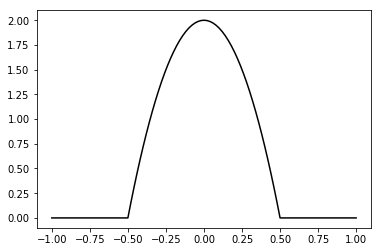

In [3]:
# for example, a quadratic pressure distribution, centred at the inlet and extending out to L/2
def p(x, x0, b, pmax):
    ''' Returns a quadratic pressure distribution.
        p = pmax*(1-((x-x0)/(b-x0))**2)     x>a
        p = 0                               x<a
    '''
    p = pmax*(1-((x-x0)/(b-x0))**2)
    p[np.where(abs(x)>b)]=0
    return p
    
f,ax = plt.subplots(1,1)
x = np.linspace(-1,1,101)
ax.plot(x, p(x,0,0.5,2.),'k-')
plt.show()